In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [24]:
%pip install cartopy
 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib import colormaps
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Analisi degli Incidenti negli Stati Uniti D'America nel 2016

##### Il Notebook prenderà in revisione da un Dataset del 2023 riguardante un timeframe di circa 7 anni sugli incidenti riportati. Essendo una popolazione molto grande, abbiamo scelto di analizzare solamente un campione che prende in considerazione l'Anno 2016. Al dataset è stato aggiunto un campo con il giorno della settimana e sono stati rimossi colonne circostanziali superflue all'analisi (eg.Ora della misurazione meteorologica effettuata)

In [25]:
df = pd.read_csv(r'C:\Users\NarcisSilviuAlexandr\OneDrive - ITS Incom\Desktop\Statistica\data\incidenti_2016 (1).csv')

## La Severity indica quanto l'incidente è grave e/o ha arrecato disagio alla circolazione


 La media tra tutti i valori (che spaziano da 1 a 4) è di 2.38 con una deviazione standard di 0.55. Questo può aiutare a capire come i vari incidenti provocati o registrati siano tendendi ad una gravità medio bassa e che tendono ad essere sempre in questo range, in una distribuzione quasi normale. La curtosi evidenzia invece un peso sulle code molto basso ed un leggero appuntimento verso l'alto ad indicare valori centrali che superano la media. Infine la Skewness indica una gobba leggermente spostata a destra, il che suggerisce più valori più alti (4) rispetto a quelli più bassi (1) ma che non influenzano di troppo la distribuzione

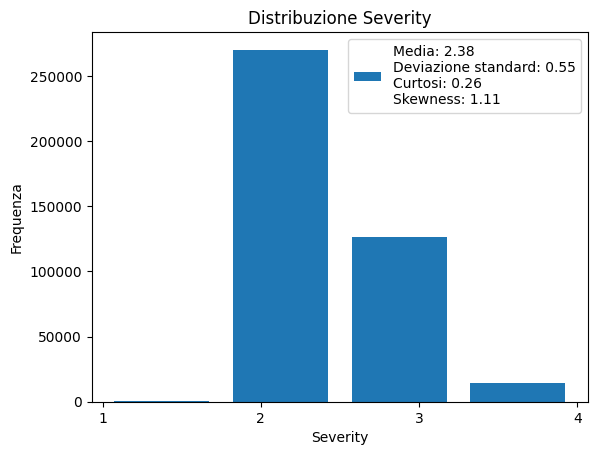

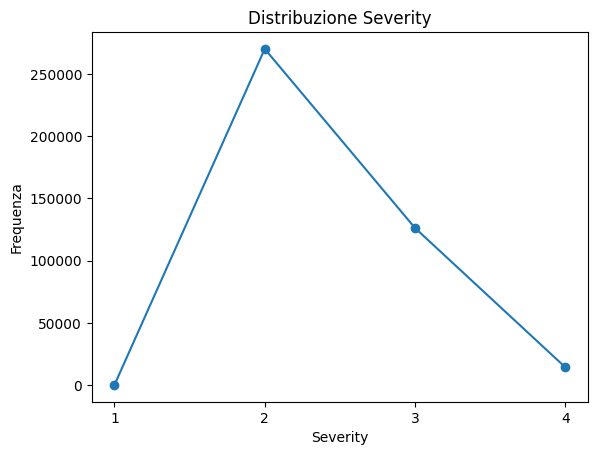

In [26]:
df['Severity'].plot(kind='hist', bins=4, rwidth=0.8)
plt.title('Distribuzione Severity')
plt.xlabel('Severity')
plt.ylabel('Frequenza')
plt.xticks([1,2,3,4])
plt.legend(['Media: {:.2f}\nDeviazione standard: {:.2f}\nCurtosi: {:.2f}\nSkewness: {:.2f}'.format(df['Severity'].mean(), df['Severity'].std(), df['Severity'].kurt(), df['Severity'].skew())])
plt.show()


df['Severity'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Distribuzione Severity')
plt.xlabel('Severity')
plt.ylabel('Frequenza')
plt.xticks([1,2,3,4])
plt.show()




#### Weather Condition indica che tempo c'era nel luogo e nell'ora dell'incidente

###### Dividendo le varie condizioni meteo tra condizioni favorevoli e sfavorevoli, possiamo notare come queste sembrino non essere un elemento predominante come causa di incidenti, ad indicare di contro una maggiore prudenza degli autisti in condizioni meteo avverse. A maggiore riprova di ciò, la cultura automobilistica degli americani sembra dare conferma a questa tesi

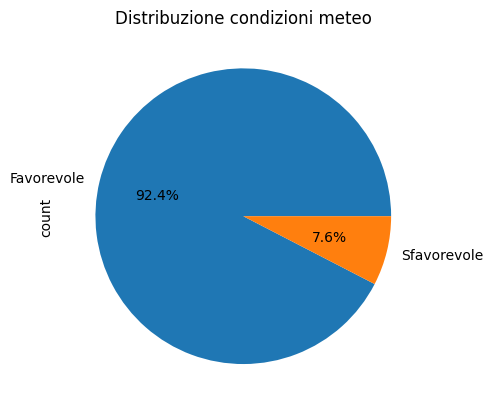

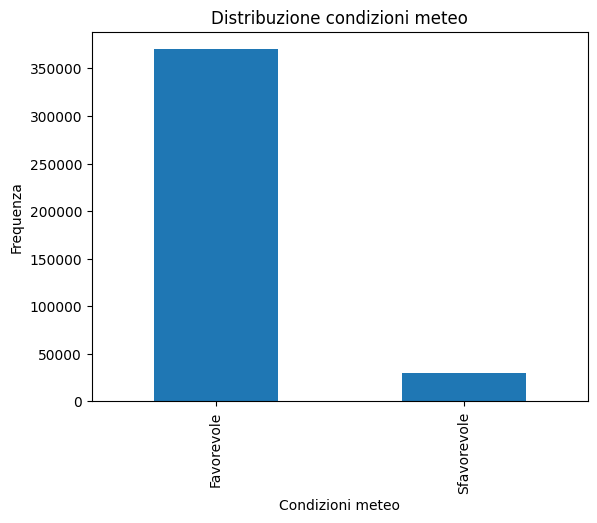

In [27]:

weather_dict = {
    'Clear': 'Favorevole',
    'Fair': 'Favorevole',
    'Overcast': 'Favorevole',
    'Partly Cloudy': 'Favorevole',
    'Mostly Cloudy': 'Favorevole',
    'Scattered Clouds': 'Favorevole',
    'Light Rain': 'Sfavorevole',
    'Rain': 'Sfavorevole',
    'Heavy Rain': 'Sfavorevole',
    'Light Snow': 'Sfavorevole',
    'Snow': 'Sfavorevole',
    'Heavy Snow': 'Sfavorevole',
    'Fog': 'Sfavorevole',
    'Haze': 'Sfavorevole',
    'Smoke': 'Sfavorevole',
    'Mist': 'Sfavorevole',
    'Thunderstorm': 'Sfavorevole',
    'Thunderstorms and Rain': 'Sfavorevole',
    'Thunderstorms and Snow': 'Sfavorevole',
    'Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Ice Pellets': 'Sfavorevole',
    'Blowing Sand': 'Sfavorevole',
    'Blowing Snow': 'Sfavorevole',
    'Widespread Dust': 'Sfavorevole',
    'Sand': 'Sfavorevole',
    'Volcanic Ash': 'Sfavorevole',
    'Unknown': 'Neutro',
    'Other': 'Neutro',
    'Heavy Rain Showers': 'Sfavorevole',
    'Light Freezing Rain': 'Sfavorevole',
    'Light Freezing Drizzle': 'Sfavorevole',
    'Light Ice Pellets': 'Sfavorevole',
    'Light Thunderstorms and Rain': 'Sfavorevole',
    'Light Thunderstorm': 'Sfavorevole',
    'Light Thunderstorms and Snow': 'Sfavorevole',
    'Light Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Light Snow Showers': 'Sfavorevole',
    'Light Snow Grains': 'Sfavorevole',
    'Light Snow Pellets': 'Sfavorevole',
    'Light Hail Showers': 'Sfavorevole',
    'Light Hail': 'Sfavorevole',
    'Light Ice Pellet Showers': 'Sfavorevole',
    'Heavy Thunderstorms and Rain': 'Sfavorevole',
    'Heavy Thunderstorm': 'Sfavorevole',
    'Heavy Thunderstorms and Snow': 'Sfavorevole',
    'Heavy Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Heavy Snow Showers': 'Sfavorevole',
    'Heavy Snow Grains': 'Sfavorevole',
    'Heavy Snow Pellets': 'Sfavorevole',
    'Heavy Hail': 'Sfavorevole',
    'Heavy Ice Pellet Showers': 'Sfavorevole',
    'Heavy Ice Pellets': 'Sfavorevole'
}

df['Weather_Condition'] = df['Weather_Condition'].map(weather_dict)

df['Weather_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuzione condizioni meteo')
plt.show()

df['Weather_Condition'].value_counts().plot(kind='bar')
plt.title('Distribuzione condizioni meteo')
plt.xlabel('Condizioni meteo')
plt.ylabel('Frequenza')
plt.show()



#### Correlazione tra weather condition e gravità dell'incidente

###### Analisi volta a studiare la relazione tra le weather condition e la gravità degli incidenti stradali. L’obiettivo è comprendere se determinate condizioni atmosferiche influiscono sull'entità degli incidenti, e in che misura.


C:\Users\NarcisSilviuAlexandr\AppData\Local\Temp\ipykernel_5980\2846483388.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10.index, rotation=45, ha='right')


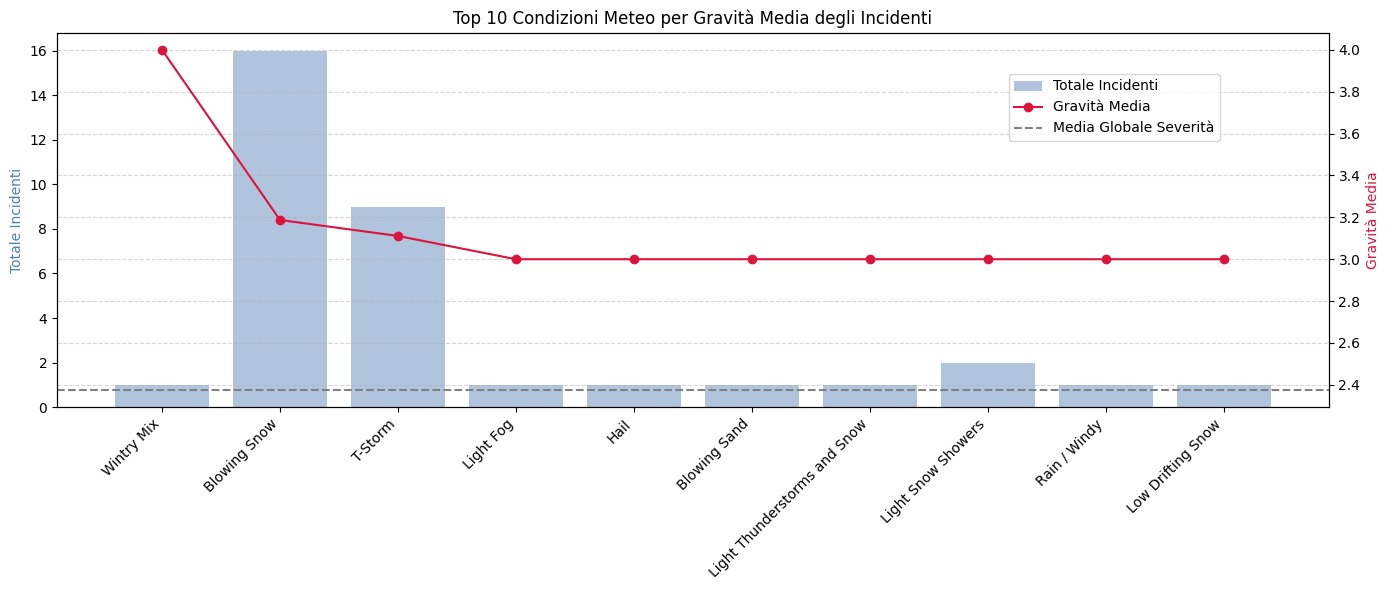

In [28]:
def grafico_top10_per_gravita(csv_path):
    # Carica i dati
    df = pd.read_csv(csv_path)

    # Pulisce i dati
    df = df.dropna(subset=['Weather_Condition', 'Severity'])
    df['Severity'] = pd.to_numeric(df['Severity'], errors='coerce')

    # Calcola numero di incidenti e gravità media per condizione meteo
    gruppo = df.groupby('Weather_Condition').agg({
        'Severity': ['count', 'mean']
    })
    gruppo.columns = ['Totale Incidenti', 'Gravità Media']

    # Ordina per gravità media e prendi le prime 10
    top10 = gruppo.sort_values(by='Gravità Media', ascending=False).head(10)

    # Calcola la media generale della gravità
    media_globale = df['Severity'].mean()

    # Grafico combinato
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Barre: Totale incidenti
    ax1.bar(top10.index, top10['Totale Incidenti'], color='lightsteelblue', label='Totale Incidenti')
    ax1.set_ylabel('Totale Incidenti', color='steelblue')
    ax1.set_xticklabels(top10.index, rotation=45, ha='right')

    # Linea: Gravità media
    ax2 = ax1.twinx()
    ax2.plot(top10.index, top10['Gravità Media'], color='crimson', marker='o', label='Gravità Media')
    ax2.axhline(media_globale, color='gray', linestyle='--', linewidth=1.5, label='Media Globale Severità')
    ax2.set_ylabel('Gravità Media', color='crimson')

    # Titolo e legenda
    plt.title('Top 10 Condizioni Meteo per Gravità Media degli Incidenti')
    fig.tight_layout()
    fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.88))
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

csv_path = r'C:\Users\NarcisSilviuAlexandr\OneDrive - ITS Incom\Desktop\Statistica\data\incidenti_2016 (1).csv'
grafico_top10_per_gravita(csv_path)


###### Il grafico mostra che, con il peggioramento delle condizioni meteo, la percentuale di incidenti gravi tende ad aumentare.

   Gravità  Favorevole (%)  Sfavorevole (%)  Differenza (%)
0        1            0.06             0.03           -0.03
1        2           66.13            63.39           -2.74
2        3           30.44            32.46            2.02
3        4            3.38             4.11            0.73


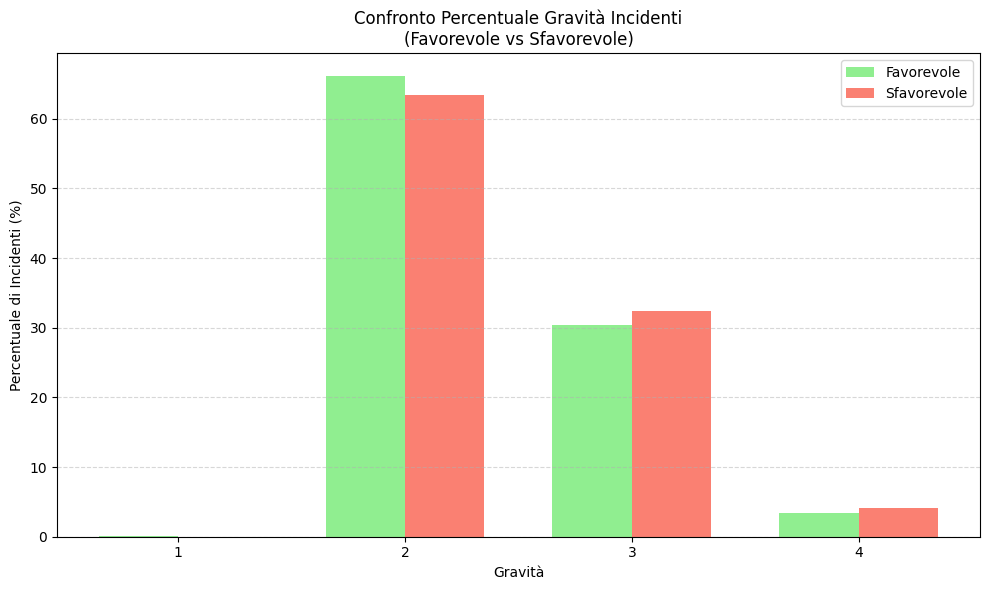

In [29]:
def confronto_probabilita_incidenti(csv_path):
    # Dizionario meteo -> categoria
    weather_dict = {
        'Clear': 'Favorevole',
        'Fair': 'Favorevole',
        'Overcast': 'Favorevole',
        'Partly Cloudy': 'Favorevole',
        'Mostly Cloudy': 'Favorevole',
        'Scattered Clouds': 'Favorevole',
        'Light Rain': 'Sfavorevole',
        'Rain': 'Sfavorevole',
        'Heavy Rain': 'Sfavorevole',
        'Light Snow': 'Sfavorevole',
        'Snow': 'Sfavorevole',
        'Heavy Snow': 'Sfavorevole',
        'Fog': 'Sfavorevole',
        'Haze': 'Sfavorevole',
        'Smoke': 'Sfavorevole',
        'Mist': 'Sfavorevole',
        'Thunderstorm': 'Sfavorevole',
        'Thunderstorms and Rain': 'Sfavorevole',
        'Thunderstorms and Snow': 'Sfavorevole',
        'Thunderstorms and Ice Pellets': 'Sfavorevole',
        'Ice Pellets': 'Sfavorevole',
        'Blowing Sand': 'Sfavorevole',
        'Blowing Snow': 'Sfavorevole',
        'Widespread Dust': 'Sfavorevole',
        'Sand': 'Sfavorevole',
        'Volcanic Ash': 'Sfavorevole',
        'Unknown': 'Neutro',
        'Other': 'Neutro',
        'Heavy Rain Showers': 'Sfavorevole',
        'Light Freezing Rain': 'Sfavorevole',
        'Light Freezing Drizzle': 'Sfavorevole',
        'Light Ice Pellets': 'Sfavorevole',
        'Light Thunderstorms and Rain': 'Sfavorevole',
        'Light Thunderstorm': 'Sfavorevole',
        'Light Thunderstorms and Snow': 'Sfavorevole',
        'Light Thunderstorms and Ice Pellets': 'Sfavorevole',
        'Light Snow Showers': 'Sfavorevole',
        'Light Snow Grains': 'Sfavorevole',
        'Light Snow Pellets': 'Sfavorevole',
        'Light Hail Showers': 'Sfavorevole',
        'Light Hail': 'Sfavorevole',
        'Light Ice Pellet Showers': 'Sfavorevole',
        'Heavy Thunderstorms and Rain': 'Sfavorevole',
        'Heavy Thunderstorm': 'Sfavorevole',
        'Heavy Thunderstorms and Snow': 'Sfavorevole',
        'Heavy Thunderstorms and Ice Pellets': 'Sfavorevole',
        'Heavy Snow Showers': 'Sfavorevole',
        'Heavy Snow Grains': 'Sfavorevole',
        'Heavy Snow Pellets': 'Sfavorevole',
        'Heavy Hail': 'Sfavorevole',
        'Heavy Ice Pellet Showers': 'Sfavorevole',
        'Heavy Ice Pellets': 'Sfavorevole'
    }

    # Carica dati
    df = pd.read_csv(csv_path)
    df = df.dropna(subset=['Weather_Condition', 'Severity'])
    df['Severity'] = pd.to_numeric(df['Severity'], errors='coerce')
    df['Condizione_Meteo'] = df['Weather_Condition'].map(weather_dict)
    df = df.dropna(subset=['Condizione_Meteo'])

    # Filtra
    fav_df = df[df['Condizione_Meteo'] == 'Favorevole']
    sfav_df = df[df['Condizione_Meteo'] == 'Sfavorevole']

    # Conteggi per gravità
    bins = sorted(df['Severity'].dropna().unique())
    fav_counts = fav_df['Severity'].value_counts().reindex(bins, fill_value=0)
    sfav_counts = sfav_df['Severity'].value_counts().reindex(bins, fill_value=0)

    # Percentuali
    fav_perc = (fav_counts / fav_counts.sum() * 100).round(2)
    sfav_perc = (sfav_counts / sfav_counts.sum() * 100).round(2)

    # Differenza percentuale
    diff = (sfav_perc - fav_perc).round(2)

    # Tabella
    confronto_df = pd.DataFrame({
        'Gravità': bins,
        'Favorevole (%)': fav_perc.values,
        'Sfavorevole (%)': sfav_perc.values,
        'Differenza (%)': diff.values
    })

    print(confronto_df)

    # Grafico comparativo
    width = 0.35
    x = range(len(bins))

    plt.figure(figsize=(10, 6))
    plt.bar([i - width/2 for i in x], fav_perc, width=width, label='Favorevole', color='lightgreen')
    plt.bar([i + width/2 for i in x], sfav_perc, width=width, label='Sfavorevole', color='salmon')
    plt.xticks(x, [str(b) for b in bins])
    plt.xlabel('Gravità')
    plt.ylabel('Percentuale di Incidenti (%)')
    plt.title('Confronto Percentuale Gravità Incidenti\n(Favorevole vs Sfavorevole)')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Esegui la funzione
csv_path = r'C:\Users\NarcisSilviuAlexandr\OneDrive - ITS Incom\Desktop\Statistica\data\incidenti_2016 (1).csv'
confronto_probabilita_incidenti(csv_path)


  In condizioni favorevoli, la distribuzione degli incidenti è fortemente dominata da eventi di gravità 2 (66,13%), con una frequenza molto bassa per i livelli di gravità 1 e 4. La distribuzione risulta asimmetrica a sinistra, con la maggior parte dei casi concentrata su gravità più basse, suggerendo una situazione generalmente meno grave. Al contrario, in condizioni sfavorevoli, pur rimanendo la gravità 2 predominante, si registra un aumento significativo della presenza di incidenti con gravità 3 e 4. Questo spostamento verso destra nella distribuzione indica una maggiore probabilità di eventi più gravi.


In condizioni favorevoli, la distribuzione degli incidenti è fortemente dominata da eventi di gravità 2 (66,13%), con una frequenza molto bassa per i livelli di gravità 1 e 4. La distribuzione risulta asimmetrica a sinistra, con la maggior parte dei casi concentrata su gravità più basse, suggerendo una situazione generalmente meno grave. Al contrario, in condizioni sfavorevoli, pur rimanendo la gravità 2 predominante, si registra un aumento significativo della presenza di incidenti con gravità 3 e 4. Questo spostamento verso destra nella distribuzione indica una maggiore probabilità di eventi più gravi.

Questa differenza tra le due distribuzioni suggerisce una possibile correlazione tra le condizioni ambientali e la gravità degli incidenti. In particolare, il peggioramento delle condizioni può influenzare negativamente la dinamica degli incidenti, portando a conseguenze più serie.

Se consideriamo la presenza di una correlazione, si possono ipotizzare diverse relazioni causali: condizioni sfavorevoli possono ridurre la visibilità e l’aderenza al suolo, aumentando la probabilità di impatti violenti; gli automobilisti potrebbero non adattare adeguatamente il loro comportamento al contesto; oppure, le infrastrutture potrebbero non essere sufficientemente attrezzate per gestire situazioni critiche, aggravando le conseguenze.

Al contrario, se non ci fosse una correlazione evidente, si potrebbero formulare ipotesi alternative. Ad esempio, fattori come la distrazione, l’eccesso di velocità o l’uso di sostanze potrebbero avere un peso maggiore rispetto alle condizioni esterne. È anche possibile che, in presenza di condizioni sfavorevoli, gli automobilisti adottino comportamenti più prudenti che compensano il rischio aggiuntivo. Un’altra possibilità è che i dati aggregati nascondano variazioni locali più rilevanti.

In conclusione, i dati mostrano una tendenza che suggerisce una relazione tra condizioni ambientali e gravità dell’incidente. Per confermare o escludere ipotesi causali, sarebbero utili ulteriori analisi statistiche, l’integrazione con altri fattori di rischio e la segmentazione dei dati per contesto territoriale o tipologia di strada.


## Gli incidenti vengono anche suddivisi per tipologia

 Per comodità si è deciso di evidenziare gli eventi che in una qualche maniera possano mettere in relazione, da un punto di vista logico, più di un attore. Le intersezioni, i segnali di stop ed i semafori sono un chiaro esempio di questo ragionamento, mentre le distrazioni o altri fattori esterni sono rilegati ad un'altra categoria. Da questa suddivisione possiamo evincere  degli incidenti con elementi significativi abbia coinvolto più di un automobilista, superando di più di dieci volte degli eventi che potenzialmente hanno coinvolto solo un'automobilista

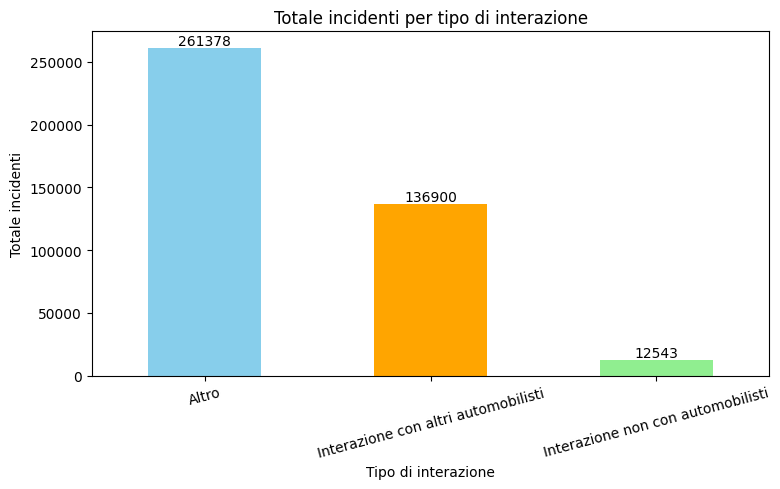

In [30]:
# Colonne che indicano interazione con altri automobilisti
auto_cols = ['Junction', 'Crossing', 'Traffic_Signal', 'Give_Way']

# Tutte le colonne strutturali rilevanti
all_cols = [
    'Junction', 'Crossing', 'Traffic_Signal', 'Give_Way', 'Stop', 'Railway',
    'Roundabout', 'Station', 'Bump', 'Traffic_Calming', 'Turning_Loop',
    'Amenity', 'No_Exit'
]

# Colonne che indicano interazione non con automobilisti
non_auto_cols = list(set(all_cols) - set(auto_cols))

# Inizializza la colonna Interaction
df['Interaction'] = 'Altro'

# Condizione 1: Interazione con altri automobilisti
mask_auto = df[auto_cols].any(axis=1)
df.loc[mask_auto, 'Interaction'] = 'Interazione con altri automobilisti'

# Condizione 2: Interazione non con automobilisti
mask_non_auto = (~mask_auto) & df[non_auto_cols].any(axis=1)
df.loc[mask_non_auto, 'Interaction'] = 'Interazione non con automobilisti'

# Condizione 3: Nessuna interazione (tutti NaN)
mask_none = df[all_cols].isna().all(axis=1)
df.loc[mask_none, 'Interaction'] = 'Nessuna interazione'

# ===================
# GRAFICO: Totale incidenti per tipo di interazione
interaction_totals = df['Interaction'].value_counts()
ax = interaction_totals.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen', 'gray'], figsize=(8, 5))
plt.title('Totale incidenti per tipo di interazione')
plt.xlabel('Tipo di interazione')
plt.ylabel('Totale incidenti')
plt.xticks(rotation=15)

# Aggiungi valori assoluti sopra le barre
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


#### Analisi su Ora e Giorno


 In ultima analisi si è analizzato l'ora ed il giorno relative all'incidente, tenendo conto che il dataset parte da Febbraio e non dal primo di Gennaio. 

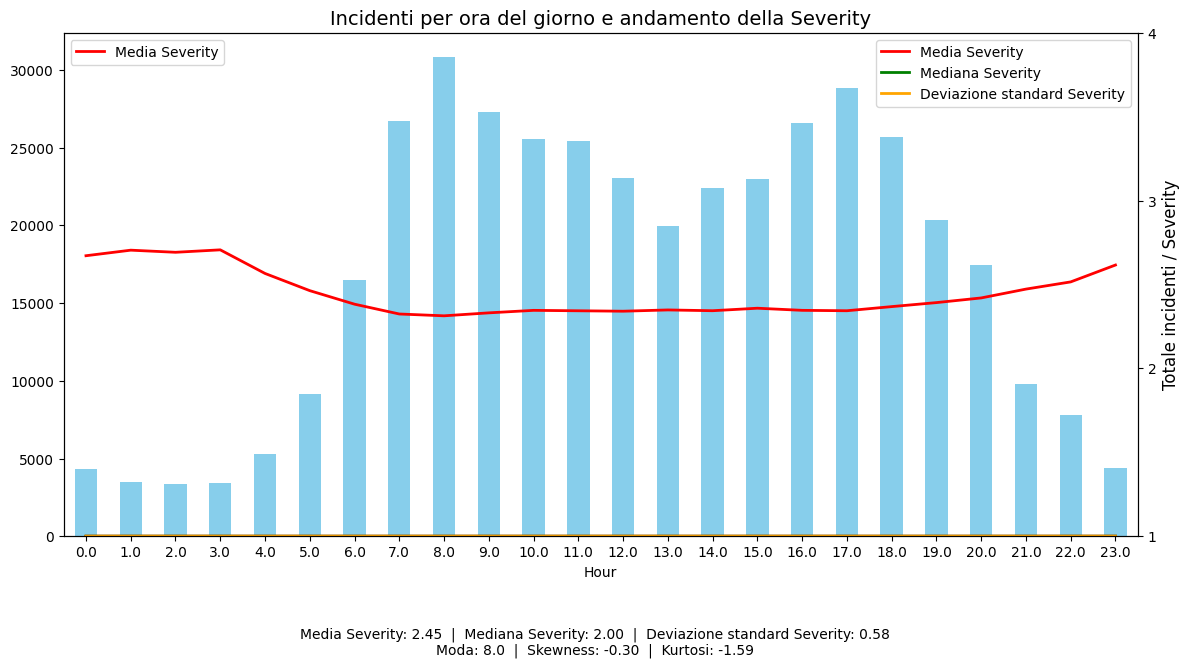

In [31]:
# Estrai l'ora e calcola la frequenza degli incidenti per ora
hourly_incidents = df['Hour'].value_counts().sort_index()

# Calcola le statistiche
moda = hourly_incidents.idxmax()
skew_val = hourly_incidents.skew()
kurt_val = hourly_incidents.kurt()

# Calcola la media, la mediana e la deviazione standard sugli incidenti totali divisi per ora
hourly_incidents_mean = df.groupby('Hour')['Severity'].mean()
hourly_incidents_median = df.groupby('Hour')['Severity'].median()
hourly_incidents_std = df.groupby('Hour')['Severity'].std()

# Crea il grafico
plt.figure(figsize=(12, 6))
hourly_incidents.plot(kind='bar', color='skyblue', label='Totale Incidenti')

# Sovrapponi l'andamento della severity per ora
hourly_incidents_mean.plot(legend=True, label='Media Severity', color='red', linewidth=2)
hourly_incidents_median.plot(legend=True, label='Mediana Severity', color='green', linewidth=2)
hourly_incidents_std.plot(legend=True, label='Deviazione standard Severity', color='orange', linewidth=2)

#fai un secondo asse per la severity
plt.twinx()
plt.ylabel('Severity')
hourly_incidents_mean.plot(legend=True, label='Media Severity', color='red', linewidth=2)
plt.yticks(np.arange(1, 5, 1))

# Titolo e assi
plt.title('Incidenti per ora del giorno e andamento della Severity', fontsize=14)
plt.xlabel('Ora del giorno', fontsize=12)
plt.ylabel('Totale incidenti / Severity', fontsize=12)
plt.xticks(rotation=0)

# Testo con le statistiche
stats_text = (
    f"Media Severity: {hourly_incidents_mean.mean():.2f}  |  "
    f"Mediana Severity: {hourly_incidents_median.median():.2f}  |  "
    f"Deviazione standard Severity: {hourly_incidents_std.mean():.2f}\n"
    f"Moda: {moda}  |  "
    f"Skewness: {skew_val:.2f}  |  "
    f"Kurtosi: {kurt_val:.2f}"
)

# Inserisci il testo sotto il grafico
plt.figtext(0.5, -0.1, stats_text, ha='center', fontsize=10)

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

È possibile osservare come la gravità degli incidenti tenda ad aumentare sensibilmente nelle ore notturne, nonostante il numero complessivo di incidenti sia decisamente inferiore rispetto a quello delle ore diurne. Questa situazione suggerisce una correlazione negativa tra il volume degli incidenti e la loro gravità: ci sono meno incidenti, ma più gravi.

Le cause di questa maggiore gravità possono essere attribuite a vari fattori tipici delle ore notturne come:
- Minor visibilità
- Stanchezza del conducente
- Maggiore utilizzo di alcol o altre sostanze
- Velocità più elevata per via di strade meno trafficate

Questi elementi non solo sono correlati, ma possono rappresentare direttamente delle cause di incidenti più gravi. 

D’altra parte, i dati mostrano che il picco assoluto di incidenti si verifica alle ore 8:00 e alle 17:00, fasce orarie coerenti con l’inizio e la fine della giornata lavorativa e scolastica. In questo caso la correlazione tra orario e numeri degli incidenti è evidente e la causa può essere ragionevolmente attributia al maggiore traffico di veicoli e nella fretta legata a spostamenti.

## Analisi su giorno settimana e country

Vengono suddivisi i giorni della settimana e calcolati il numero di incidenti per essi. Inoltre viene anche visualizzato il totale per i 50 stati americani

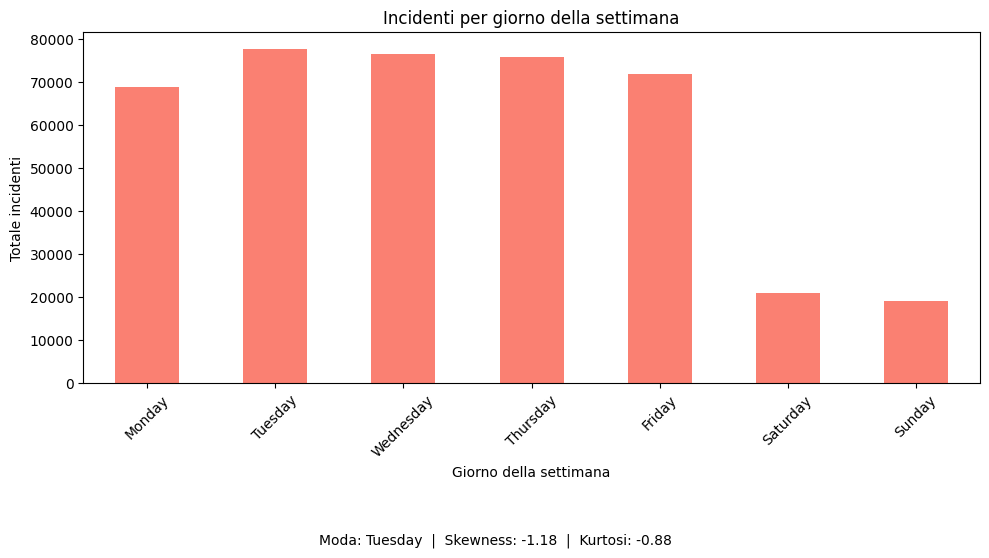

In [32]:
# Prepara dati weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
weekday_incidents = df['Weekday'].value_counts().reindex(weekday_order)

# Statistiche
moda_w = weekday_incidents.idxmax()
skew_w = weekday_incidents.skew()
kurt_w = weekday_incidents.kurt()

# Grafico a barre
plt.figure(figsize=(10, 5))
weekday_incidents.plot(kind='bar', color='salmon')
plt.title('Incidenti per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Totale incidenti')
plt.xticks(rotation=45)
stats_text_w = (
    f"Moda: {moda_w}  |  "
    f"Skewness: {skew_w:.2f}  |  "
    f"Kurtosi: {kurt_w:.2f}"
)
plt.figtext(0.5, -0.1, stats_text_w, ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Il grafico mostra le distribuzione degli incidenti per i giorni della settimana. E' possibile osservare come la maggior parte di essi si concentri nei giorni feriali mentre solo una minoranza nei weekend.
Questo è indicato da una assimetria negativa che porta la coda della distribuzione verso sinistra, ovvero che il numero di incidenti nel weekend si discota molto dalla media.
La curtosi indica invece la forma che può possedere la coda. In questo caso essendo negativa indica una distribuzione più piatta con meno valori estremi, infatti gli incidenti sono distributi in modo piuttosto uniforme nei giorni feriali senza grandi picchi.


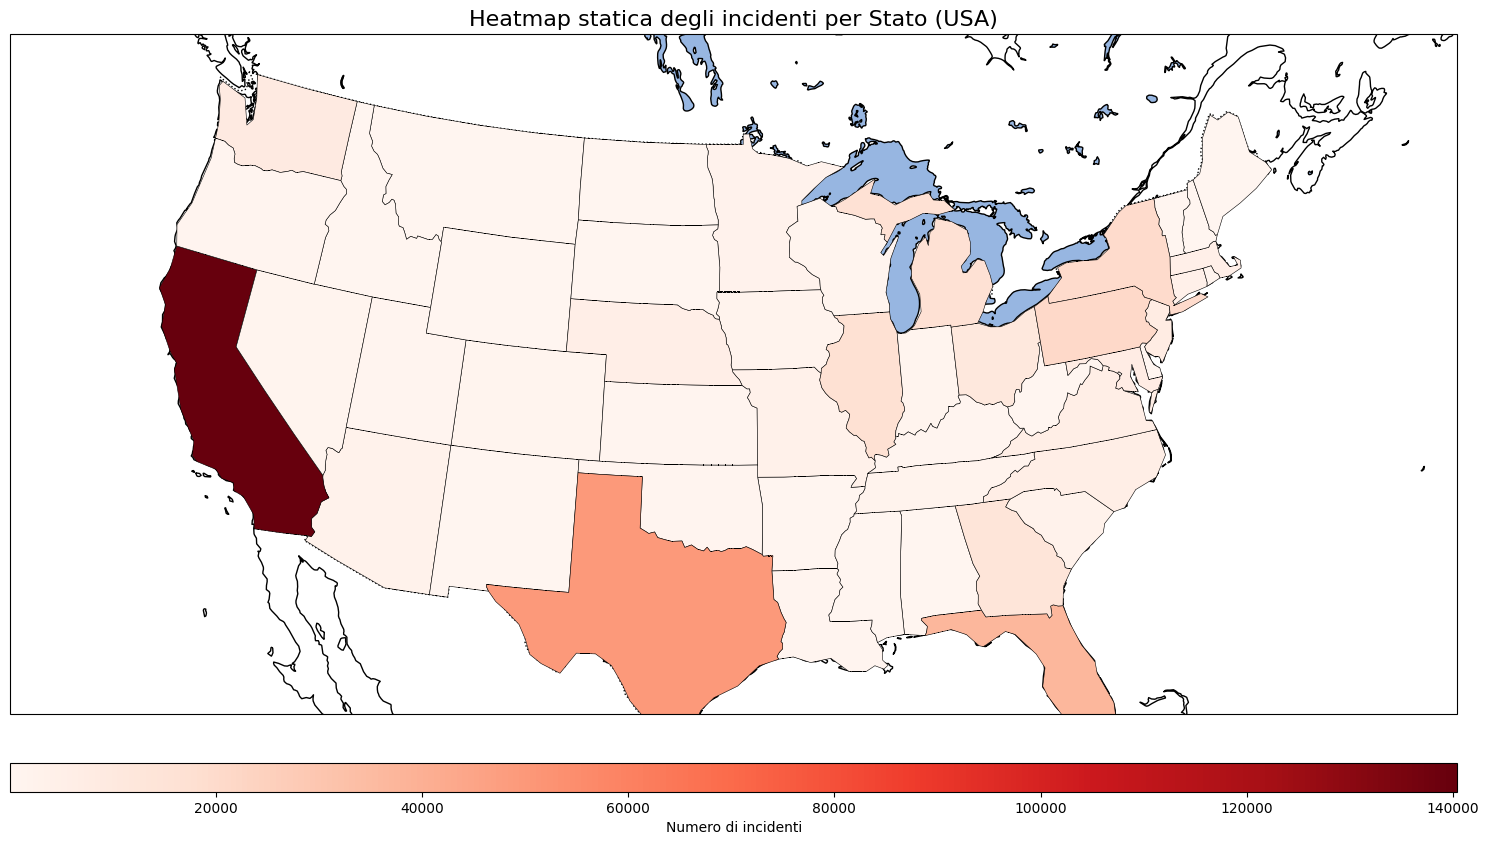

In [33]:
# Conta incidenti per stato
state_incidents = df['State'].value_counts()

# Leggi shapefile dei confini USA
shapefile = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces_lakes')
reader = shpreader.Reader(shapefile)
states = list(reader.records())

# Setup mappa
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, edgecolor='black')

# Colori
cmap = colormaps['Reds']
norm = Normalize(vmin=state_incidents.min(), vmax=state_incidents.max())

# Disegna stati colorati
for state in states:
    abbrev = state.attributes.get('postal')
    if abbrev in state_incidents:
        color = cmap(norm(state_incidents[abbrev]))
    else:
        color = 'lightgray'

    ax.add_geometries(
        [state.geometry],
        ccrs.PlateCarree(),
        facecolor=color,
        edgecolor='black',
        linewidth=0.4
    )


# Barra colore
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Numero di incidenti')

plt.title("Heatmap statica degli incidenti per Stato (USA)", fontsize=16)
plt.tight_layout()
plt.show()


Dalla mappa è possibile apprendere come gli stati in cui si verificano il maggior numero di incidenti sono anche quelli più popolosi, ovvero la California, il texas e la Florida.


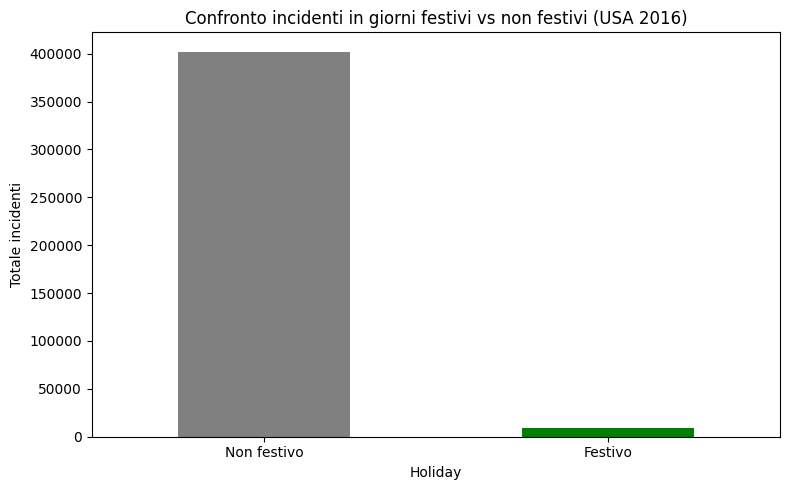

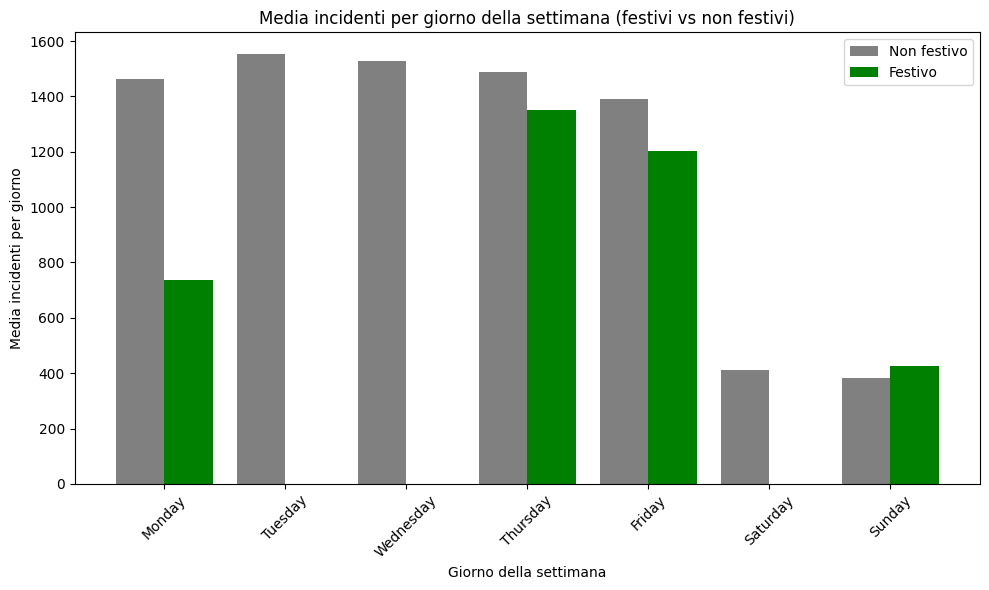

In [34]:
# Giorni festivi USA 2016
s_holidays = [
    '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
    '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25'
]
us_holidays = pd.to_datetime(s_holidays)

# Flag festivo
df['Holiday'] = df['Date'].isin(us_holidays)

# Grafico bar: Festivo vs Non festivo
plt.figure(figsize=(8, 5))
df.groupby('Holiday').size().plot(kind='bar', color=['gray', 'green'])
plt.xticks([0, 1], ['Non festivo', 'Festivo'], rotation=0)
plt.title('Confronto incidenti in giorni festivi vs non festivi (USA 2016)')
plt.ylabel('Totale incidenti')
plt.tight_layout()
plt.show()

# --- Incidenti medi per giorno della settimana (festivo vs non festivo) ---
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

holiday_weekday_avg = df[df['Holiday']].groupby('Weekday').size().reindex(weekday_order).fillna(0)
nonholiday_weekday_avg = df[~df['Holiday']].groupby('Weekday').size().reindex(weekday_order).fillna(0)

holiday_weekdays = us_holidays.day_name()
holiday_day_counts = holiday_weekdays.value_counts().reindex(weekday_order).fillna(0)

all_days = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
non_holiday_days = all_days[~all_days.isin(us_holidays)]
nonholiday_day_counts = pd.Series(non_holiday_days.day_name()).value_counts().reindex(weekday_order).fillna(0)

holiday_avg = (holiday_weekday_avg / holiday_day_counts).fillna(0)
nonholiday_avg = (nonholiday_weekday_avg / nonholiday_day_counts).fillna(0)

# Grafico comparativo
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar([i - bar_width/2 for i in range(7)], nonholiday_avg, width=bar_width, label='Non festivo', color='gray')
plt.bar([i + bar_width/2 for i in range(7)], holiday_avg, width=bar_width, label='Festivo', color='green')
plt.xticks(range(7), weekday_order, rotation=45)
plt.xlabel('Giorno della settimana')
plt.ylabel('Media incidenti per giorno')
plt.title('Media incidenti per giorno della settimana (festivi vs non festivi)')
plt.legend()
plt.tight_layout()
plt.show()


Il grafico evidenzia la differenza nel numero medio di incidenti tra giorni festivi e non festivi. È utile per valutare l’impatto delle festività sulla sicurezza stradale. Come è possibile constatare gli incidenti nei giorni festivi sono sempre inferiori rispetto a quelli nei giorni feriali, questo chiaramente dovuto al fatto alla minor circolazione di vetture in quei giorni.
L'unico valore anomalo si presenta nel giorno di Domenica, una possibile spiegazione può essere imputata alla maggior partecipazione dei eventi sportivi e alla celebrazione della messa



In [35]:
# Rimuove i valori mancanti (se ce ne sono)
severity = df['Severity'].dropna()

# Calcolo di media e deviazione standard
media = severity.mean()
dev_std = severity.std()

# Fissiamo un valore di k (es. k = 2)
k = 2

# Calcoliamo la probabilità empirica che Severity si discosti dalla media di almeno k*σ
empirica = np.mean(np.abs(severity - media) >= k * dev_std)

# Calcoliamo il limite superiore dato dalla disuguaglianza di Chebyshev
chebyshev_limite = 1 / k**2

print(f"Media: {media:.2f}")
print(f"Deviazione standard: {dev_std:.2f}")
print(f"Probabilità empirica |X - media| >= {k}σ: {empirica:.4f}")
print(f"Limite di Chebyshev (1/k²): {chebyshev_limite:.4f}")

Media: 2.38
Deviazione standard: 0.55
Probabilità empirica |X - media| >= 2σ: 0.0355
Limite di Chebyshev (1/k²): 0.2500


La variabile Severity ha una media di 2.38 e una deviazione standard di 0.55, il che significa che la maggior parte dei valori si concentra tra circa 1.83 e 2.93. Solo il 3.55% dei valori si discosta dalla media di almeno 2 deviazioni standard, indicando che i valori estremi sono rari. Questo è ben al di sotto del limite teorico di Chebyshev (25%), confermando che la distribuzione è piuttosto concentrata attorno alla media, con una bassa variabilità. In sintesi, i livelli di severità degli incidenti sono abbastanza stabili e prevedibili.

###### Bibliografia: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents